[Home](Home.ipynb)

# Sympy: A Computer Algebra System (CAS)


In [1]:
from sympy import *
import sympy

In [2]:
init_session()

IPython console for SymPy 1.7.1 (Python 3.7.9-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



In [3]:
Integer(1) / Integer(3)

In [5]:
phi = (1 + sqrt(5))/2

In [6]:
phi

In [7]:
phi.evalf(1000)

![phi diagram](https://photos1.blogger.com/blogger/1134/545/1600/pentatrig.jpg)

We can derive Phi by asking:  what whole, consisting of $1 + x$, ratioed to 1, equals 1 ratioed to that smaller $x$?  The whole $1 + x$ is to 1, as 1 is to what number $x$?

Check out how we symbolize equality between two symbolic expressions.

In [22]:
equation = Eq((x+1)/1, 1/x)
equation

Since our equation is in one variable, we should be able to solve it, using ```solve```.

In [23]:
solve(equation, x)

We have one positive root and one negative root. The positive root corresponds to a length or distance, and therefore should be our mystery $x$.

In [18]:
tau = (-1 + sqrt(5))/2
tau

In [19]:
tau.evalf(50)

The question though, was what is the whole, or 1 + x?  

We can just take the reciprocal of our answer for x, i.e. tau.

In [20]:
1/tau.evalf(50)

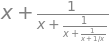

In [64]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr

list_to_frac([x]*5)

In [40]:
continued_fraction = list_to_frac([x]*50)
continued_fraction.subs(x, 1)

In [42]:
continued_fraction.subs(x, 1).evalf(20)

# Polynomials

Polynomials of the 2nd degree conventionly get a lot of focus in high school.  We learn to factor them, solve them, and plot them.

Lets take an example:

In [7]:
parabola = x**2 - 81

In [8]:
parabola

In $\LaTeX$, the multiplication symbol goes away:

In [9]:
factor(parabola)

You're not confined to polynomials of the 2nd degree of course.

In [10]:
polynomial = (x - 4)*(x + 1)*(x - 3)*(x + 2)

In [11]:
expand(polynomial)

The factors of the polynomial let you determine its "zeroes" which is where the plot crosses the x-axis, presuming the solution is in the set of real numbers.  Sympy assumes the complex field as its default domain, with real numbers of subset.

In [12]:
factor(expand(polynomial))

AKS Test for Primality:  are the coefficients of the polynomial expansion of $(x-1)^{p}$ all multiples of p?  

We're ignoring when the coefficients are 1.  

$(x+1)^{p}$ would have the same coefficients but for differences in sign.

In [46]:
def isprime(p):
    poly = Poly(expand((x-1)**p - (x**p - 1)))
    return 0==sum([C % p for C in poly.coeffs()[:p//2]])

print(list(filter(isprime, [2] + list(range(3,200,2)))))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]


Sympy makes use of ```matplotlib``` to implement its own plotting API.

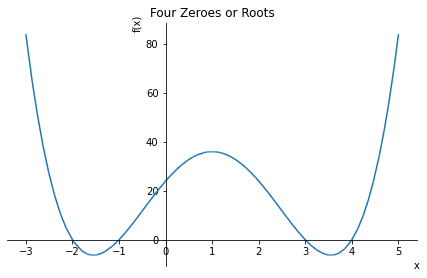

In [14]:
%matplotlib inline  
plotting.plot(polynomial, (x, -3, 5), x="x", title="Four Zeroes or Roots");

In [76]:
f = lambdify(x, polynomial, "numpy")

Below we tap ```matplotlib``` more directly.  Sometimes we might want to use legacy code with already well-thought-out cosmetic arguments.  Why reinvent the wheel?  A lot of this legacy code is using ```matplotlib.pyplot``` imported as ```plt```. We find it convenient to recycle a lot of what we find.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
a = np.arange(-3, 5, 0.1) # start, up to, interval

In [96]:
f(a)[:10]  # the target polynomial f is from a lambdification

array([84.    , 69.6141, 56.7936, 45.4461, 35.4816, 26.8125, 19.3536,
       13.0221,  7.7376,  3.4221])

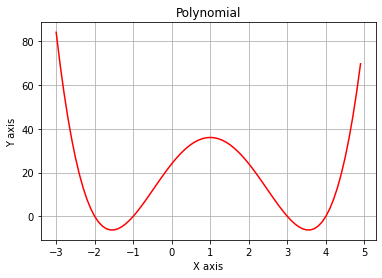

In [97]:
# familiar looking code, anchored by plt
plt.title("Polynomial") 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.grid()
plt.plot(a, f(a), color ="red") 
plt.show()

# Sequences

A great way to unify algebraic and geometric thinking is with rules giving the growth pattern of various objects.

For example, we start with a box of unit radius balls, like ball bearings or uniformly sized marbles, and pack them in what's known as the CCP arrangement, as dense as it gets (about 74% solid).

Start with a ball at the top and build downward by layers, using triangular numbers of balls:  1, 3, 6, 10, 15, 21, 28...  That's the number in each layer, but what is the cumulative number, the number in an n-frequency tetrahedron?

Now we ask the same question for a half-octahedron, and a full octahedron, and maybe a cuboctahedron...

What are the numeric sequences.  With the octahedron, we're starting again at the top, with one ball, which we underpin with 4, the 9, then 16... the "square" numbers.  What's the cumulative number?

Finally, instead of counting balls, perhaps we would like to count "kissing points" i.e. the number of points at which two balls are intertangent.  Balls at the boundary have fewer touching neighbors.  Balls in the thick of the CCP, completely surrounded, have exactly 12 neighbors.

The formulae below correspond to these edge counts.

In [34]:
expand(x*(x+1)*(x+2)) # a007531

In [33]:
expand(2*x*(x+1)*(2*x+1)) # a300758

In [44]:
expand(x*2*(x+1)**2) # a035006

In [48]:
expand(20*(x+1)**3 - 48*(x+1)**2 + 40*(x+1) - 12)

In [49]:
20*x**3 - 48*x**2 + 40*x - 12

In [52]:
def ruleVE(f): 
    """
    cumulative number of edges in x frequency
    cuboctahedral ball packing
    """
    x = f + 1
    return 20*x**3 - 48*x**2 + 40*x - 12

In [53]:
[ruleVE(x) for x in range(0, 10)]

In [56]:
eq = expand((2*n+2)*(2*n+3)*(2*n+4) )
eq

In [70]:
eq.subs(n, 0)

In [67]:
a = np.arange(10) 

In [68]:
f = lambdify(n, eq, 'numpy')

In [69]:
f(a)

array([  24,  120,  336,  720, 1320, 2184, 3360, 4896, 6840, 9240])